In [1]:
# load libraries
import warnings

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import SpectralClustering
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from sklearn.metrics import adjusted_rand_score as ari
from sklearn.metrics import (
    calinski_harabasz_score,
    davies_bouldin_score,
    silhouette_score,
)
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score as nmi
from sklearn.manifold import TSNE

In [2]:
# define fp for data
fp = "/home/cheyanne/github_repos/CPBS7602/assignment01/data/tpm_5kgenes_10tissues_formatted.csv"

In [3]:
# load data
data = pd.read_csv(fp, index_col=0)

In [4]:
# get data shape and head
print(data.shape)
print(data.head())

(12385, 5000)
                ENSG00000244734.3  ENSG00000210082.2  ENSG00000198804.2  \
Adipose Tissue              452.7             6310.0            10790.0   
Muscle                      225.7            10200.0            33610.0   
Blood Vessel                269.6             6111.0             9689.0   
Blood Vessel               5272.0            11990.0             4269.0   
Heart                      1617.0            40440.0            56700.0   

                ENSG00000198712.1  ENSG00000198938.2  ENSG00000188536.12  \
Adipose Tissue            11720.0            19890.0              102.40   
Muscle                    37500.0            62560.0               52.01   
Blood Vessel              12250.0            19450.0               62.95   
Blood Vessel              10630.0            16440.0             1323.00   
Heart                     39220.0            64660.0              403.50   

                ENSG00000198899.2  ENSG00000198886.2  ENSG00000275896.5  \
Adi

In [5]:
# define labels as the unique values in the index
ulabels = data.index.unique()
print(f' Clusters are {ulabels}')

 Clusters are Index(['Adipose Tissue', 'Muscle', 'Blood Vessel', 'Heart', 'Skin', 'Brain',
       'Lung', 'Esophagus', 'Colon', 'Blood'],
      dtype='object')


In [6]:
# define ground truth clusters and objects 
true_clusters = ulabels.shape[0]
print(f'True clusters: {true_clusters}')

True clusters: 10


In [7]:
# define the number of value counts per label 
n_labels = data.index.value_counts()
print('Objects by cluster are:')
print(n_labels)

Objects by cluster are:
Brain             2642
Skin              1809
Esophagus         1445
Blood Vessel      1335
Adipose Tissue    1204
Blood              929
Heart              861
Muscle             803
Colon              779
Lung               578
Name: count, dtype: int64


In [ ]:
#standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
#define kmeans clusters and random init
kmeans = KMeans(n_clusters=true_clusters, random_state=42)
kmeans.fit(data_scaled)


KMeans(n_clusters=10, random_state=42)

In [ ]:
#kmeans label
data['Cluster'] = kmeans.labels_

In [ ]:
#tsne settings for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data_scaled)

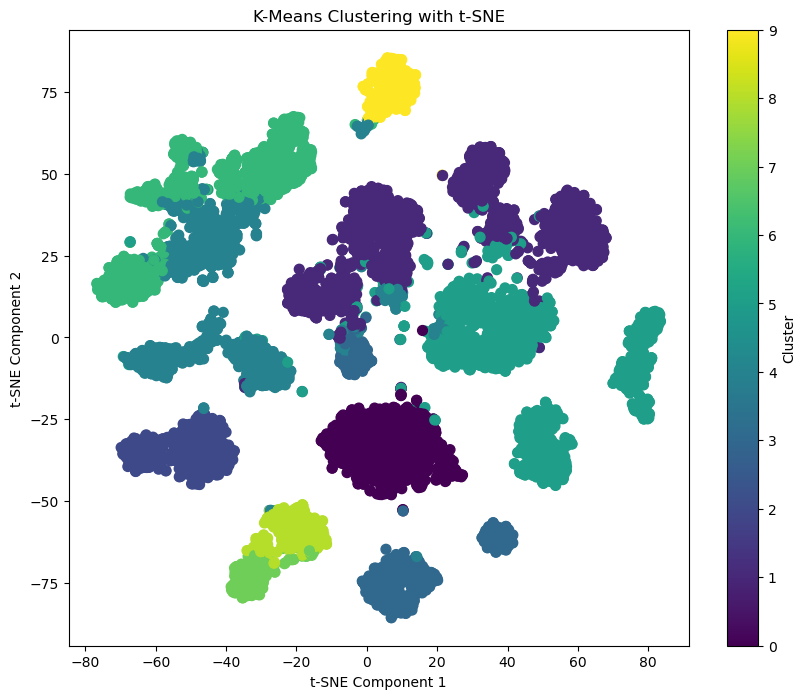

In [ ]:
#plot the tsne results
tsne_df = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])

tsne_df['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=tsne_df['Cluster'], cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('K-Means Clustering with t-SNE')
plt.show()

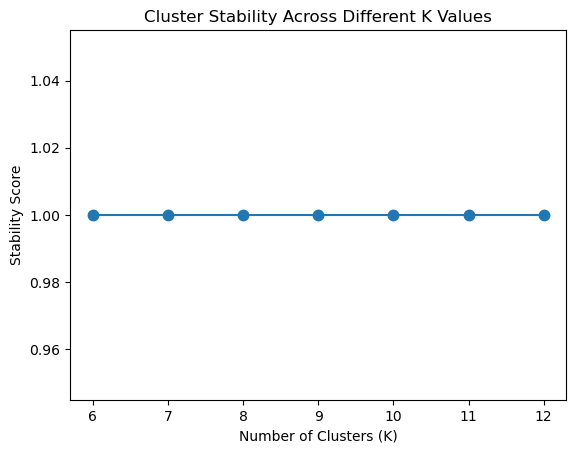

In [ ]:
Ks = range(6, 13)  # range for K (number of clusters)
n_reps = 10  # number of repetitions for each K

# variables to store results
cluster_labels = []
pairwise_ari = []
centroid_positions = {}
stability_scores = []

for k in Ks:
    labels = []
    centroids = []

    # repeat the clustering process n_reps times
    for _ in range(n_reps):
        model = KMeans(n_clusters=k, n_init=10, random_state=42)
        model.fit(data_scaled)
        labels.append(model.labels_)
        centroids.append(model.cluster_centers_)

    cluster_labels.append(labels)
    centroid_positions[k] = centroids

    # adjusted Rand Index (ARI) for stability score
    ari_distances = []

    # compare each pair of cluster assignments
    for i in range(n_reps):
        for j in range(i + 1, n_reps):
            ari = adjusted_rand_score(labels[i], labels[j])
            ari_distances.append(ari)

    pairwise_ari.append(ari_distances)
    stability_scores.append(np.mean(ari_distances))  # Mean ARI as stability score

# plot stability scores for different K values
plt.plot(Ks, stability_scores, marker=".", linestyle="-", markersize=15)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Stability Score")
plt.title("Cluster Stability Across Different K Values")
plt.show()

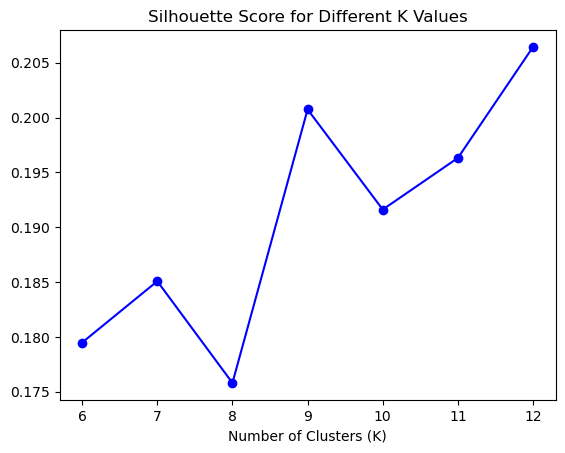

In [ ]:
# empty list to store silhouette scores for each K
silhouette_scores = []

# loop through different values of K (e.g., 2 to 10)
for k in range(6, 13):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    
    # calculate and store the silhouette score for each K
    sil_score = silhouette_score(data_scaled, labels)
    silhouette_scores.append(sil_score)

# plot Silhouette Scores for different K values
plt.plot(range(6, 13), silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (K)")
plt.title("Silhouette Score for Different K Values")
plt.show()